In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
pd.set_option("display.max_column",100)
pd.set_option('display.max_colwidth', 30)  

In [3]:
df = pd.read_csv("video_game_reviews.csv")

In [4]:
df.head()

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many b...",Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many b...",Offline,3
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphi...",Offline,5
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphi...",Online,4
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many b...",Offline,1


In [5]:
df.isnull().sum()

Game Title                 0
User Rating                0
Age Group Targeted         0
Price                      0
Platform                   0
Requires Special Device    0
Developer                  0
Publisher                  0
Release Year               0
Genre                      0
Multiplayer                0
Game Length (Hours)        0
Graphics Quality           0
Soundtrack Quality         0
Story Quality              0
User Review Text           0
Game Mode                  0
Min Number of Players      0
dtype: int64

In [6]:
df.shape

(47774, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Game Title               47774 non-null  object 
 1   User Rating              47774 non-null  float64
 2   Age Group Targeted       47774 non-null  object 
 3   Price                    47774 non-null  float64
 4   Platform                 47774 non-null  object 
 5   Requires Special Device  47774 non-null  object 
 6   Developer                47774 non-null  object 
 7   Publisher                47774 non-null  object 
 8   Release Year             47774 non-null  int64  
 9   Genre                    47774 non-null  object 
 10  Multiplayer              47774 non-null  object 
 11  Game Length (Hours)      47774 non-null  float64
 12  Graphics Quality         47774 non-null  object 
 13  Soundtrack Quality       47774 non-null  object 
 14  Story Quality         

In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique(),"\n")

Game Title
['Grand Theft Auto V' 'The Sims 4' 'Minecraft' 'Bioshock Infinite'
 'Half-Life: Alyx' 'Sid Meier’s Civilization VI' 'Just Dance 2024'
 '1000-Piece Puzzle' 'Spelunky 2' 'Street Fighter V' 'Fall Guys'
 'Rocket League' 'The Elder Scrolls V: Skyrim' 'Among Us' 'Stardew Valley'
 'Call of Duty: Modern Warfare 2'
 'The Legend of Zelda: Breath of the Wild' 'Tekken 7'
 'Pillars of Eternity II: Deadfire' 'Animal Crossing: New Horizons'
 'Hades' 'Mario Kart 8 Deluxe' 'Overwatch 2' 'Fortnite'
 'Pokémon Scarlet & Violet' 'Hitman 3' 'Tomb Raider (2013)'
 'Halo Infinite' 'Super Smash Bros. Ultimate' 'Kingdom Hearts III'
 'League of Legends' 'The Witcher 3: Wild Hunt' 'FIFA 24'
 'Ghost of Tsushima' 'Cuphead' 'Red Dead Redemption 2' 'Portal 2' 'Tetris'
 'Counter-Strike: Global Offensive' 'Super Mario Odyssey'] 

User Rating
[36.4 38.3 26.8 38.4 30.1 38.6 33.1 32.3 26.7 23.9 29.3 37.4 28.2 43.
 17.6 28.6 32.4 18.7 29.7 36.5 30.7 26.3 31.4 26.2 27.7 35.8 37.3 43.1
 31.8 35.3 31.6 32.7 29.5 28.

In [10]:
df.drop(["Game Title","Developer","Publisher","Release Year","User Review Text"],axis=1,inplace=True)

In [11]:
X = df.drop("User Rating", axis=1)
y = df['User Rating']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [13]:
def label_encode_df(X):
    return X.apply(lambda col: pd.Series(LabelEncoder().fit_transform(col)))

label_encoder_transformer = FunctionTransformer(label_encode_df)

cols_to_label_enc = ['Requires Special Device','Multiplayer','Game Mode']
cols_to_ordinal_enc = ['Age Group Targeted','Graphics Quality','Soundtrack Quality','Story Quality']
cols_to_onehot_enc = ['Platform','Genre']

ordinal_categories = [
    ['Kids', 'Teens', 'Adults', 'All Ages'],            # Age Group Targeted
    ['Low','Medium','High','Ultra'],                    # Graphics Quality
    ['Poor','Average','Good','Excellent'],              # Soundtrack Quality
    ['Poor','Average','Good','Excellent']               # Story Quality
]

preprocessor = ColumnTransformer(transformers=[
    ("LabelEncoder",label_encoder_transformer,cols_to_label_enc),
    ("OrdinalEncoder",OrdinalEncoder(categories=ordinal_categories),cols_to_ordinal_enc),
    ("OneHotEncoder",OneHotEncoder(handle_unknown="ignore",drop="first"),cols_to_onehot_enc)
],remainder="passthrough")

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [14]:
df.corr(numeric_only=True)

,User Rating,Price,Game Length (Hours),Min Number of Players
User Rating,1.000000,0.760659,0.628743,-0.000365
Price,0.760659,1.000000,-0.002613,0.001908
Game Length (Hours),0.628743,-0.002613,1.000000,-0.003122
Min Number of Players,-0.000365,0.001908,-0.003122,1.000000


In [15]:
X_train_transformed

array([[ 1.  ,  0.  ,  0.  , ..., 37.72, 46.6 ,  8.  ],
       [ 1.  ,  1.  ,  0.  , ..., 45.4 , 54.6 ,  6.  ],
       [ 1.  ,  1.  ,  1.  , ..., 32.05,  9.6 ,  2.  ],
       ...,
       [ 0.  ,  0.  ,  1.  , ..., 26.01, 34.  ,  6.  ],
       [ 0.  ,  1.  ,  1.  , ..., 51.2 , 40.7 ,  6.  ],
       [ 0.  ,  1.  ,  0.  , ..., 51.08, 56.5 ,  8.  ]])

In [16]:
scaler_train = StandardScaler()

X_train_last = scaler_train.fit_transform(X_train_transformed)
X_test_last = scaler_train.transform(X_test_transformed)

In [17]:
def calculate_model_metric(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    score = r2_score(true, predicted)
    return mae, rmse, score

In [18]:
models = {
    "Linear Regression" : LinearRegression(),
    "K Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor(),
    "Gradient Boost Regressor" : GradientBoostingRegressor(),
    "XGBoost Regressor" : XGBRegressor()
}

In [19]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_last, y_train)

    y_train_pred = model.predict(X_train_last)
    y_test_pred = model.predict(X_test_last)

    model_train_mae, model_train_rmse, model_train_r2 = calculate_model_metric(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = calculate_model_metric(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("Model performance for Training Set")
    print("Root Mean Squared Error: ", model_train_rmse)
    print("Mean Absolute Error: ", model_train_mae)
    print("R2 Score: ", model_train_r2)

    print("-----------------------------------")
    
    print("Model performance for Test Set")
    print("Root Mean Squared Error: ", model_test_rmse)
    print("Mean Absolute Error: ", model_test_mae)
    print("R2 Score: ", model_test_r2)

    print("\n")

Linear Regression
Model performance for Training Set
Root Mean Squared Error:  1.1585441586453509
Mean Absolute Error:  1.0045823980818256
R2 Score:  0.9765602083024796
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  1.1608342570668402
Mean Absolute Error:  1.0067920464438445
R2 Score:  0.976033209913893


K Neighbors Regressor
Model performance for Training Set
Root Mean Squared Error:  2.9398208853338974
Mean Absolute Error:  2.3565118615685177
R2 Score:  0.8490718300680781
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  3.5893800806960043
Mean Absolute Error:  2.8926356329537843
R2 Score:  0.7708560807704379


Decision Tree
Model performance for Training Set
Root Mean Squared Error:  1.35992969108048e-16
Mean Absolute Error:  5.354354972236312e-18
R2 Score:  1.0
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  1.671621514060302
Mean Absolute Error:  1

In [ ]:
label_encoded_cols = cols_to_label_enc

ordinal_encoded_cols = cols_to_ordinal_enc

ohe = OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False)
ohe.fit(X[cols_to_onehot_enc])
onehot_encoded_cols = ohe.get_feature_names_out(cols_to_onehot_enc)

passthrough_cols = list(X.drop(columns=cols_to_label_enc + cols_to_ordinal_enc + cols_to_onehot_enc).columns)

all_feature_names = (
    label_encoded_cols + 
    ordinal_encoded_cols + 
    list(onehot_encoded_cols) + 
    passthrough_cols
)

X_train_df = pd.DataFrame(X_train_last, columns=all_feature_names)
X_test_df = pd.DataFrame(X_test_last, columns=all_feature_names)

In [21]:
X_train_df.head()

,Requires Special Device,Multiplayer,Game Mode,Age Group Targeted,Graphics Quality,Soundtrack Quality,Story Quality,Platform_Nintendo Switch,Platform_PC,Platform_PlayStation,Platform_Xbox,Genre_Adventure,Genre_Fighting,Genre_Party,Genre_Puzzle,Genre_RPG,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Price,Game Length (Hours),Min Number of Players
0,0.996990,-0.993490,-0.999944,0.449889,1.348691,0.439184,1.345139,-0.503486,-0.502702,-0.504052,2.037206,-0.332092,-0.330327,-0.332195,-0.335294,2.990734,-0.336272,-0.333643,-0.332092,-0.337402,-0.195381,0.893402,1.041771
1,0.996990,1.006552,-0.999944,-0.443208,-1.349695,-0.456075,1.345139,-0.503486,-0.502702,-0.504052,2.037206,-0.332092,3.027299,-0.332195,-0.335294,-0.334366,-0.336272,-0.333643,-0.332092,-0.337402,0.469799,1.398465,0.319072
2,0.996990,1.006552,1.000056,1.342986,1.348691,-0.456075,0.452251,-0.503486,1.989249,-0.504052,-0.490868,-0.332092,-0.330327,-0.332195,-0.335294,-0.334366,2.973787,-0.333643,-0.332092,-0.337402,-0.686472,-1.442515,-1.126324
3,-1.003019,1.006552,-0.999944,-0.443208,-1.349695,1.334443,1.345139,-0.503486,1.989249,-0.504052,-0.490868,-0.332092,-0.330327,-0.332195,-0.335294,-0.334366,2.973787,-0.333643,-0.332092,-0.337402,-0.987882,1.171187,0.680421
4,-1.003019,-0.993490,1.000056,-0.443208,-1.349695,-0.456075,-0.440638,1.986151,-0.502702,-0.504052,-0.490868,-0.332092,-0.330327,-0.332195,2.982458,-0.334366,-0.336272,-0.333643,-0.332092,-0.337402,0.384053,1.240633,1.764469


In [22]:
X_test_df.head()

,Requires Special Device,Multiplayer,Game Mode,Age Group Targeted,Graphics Quality,Soundtrack Quality,Story Quality,Platform_Nintendo Switch,Platform_PC,Platform_PlayStation,Platform_Xbox,Genre_Adventure,Genre_Fighting,Genre_Party,Genre_Puzzle,Genre_RPG,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Price,Game Length (Hours),Min Number of Players
0,0.99699,-0.993490,-0.999944,1.342986,1.348691,1.334443,0.452251,-0.503486,-0.502702,1.983921,-0.490868,-0.332092,-0.330327,3.010279,-0.335294,-0.334366,-0.336272,-0.333643,-0.332092,-0.337402,1.224190,-1.480395,1.041771
1,0.99699,-0.993490,1.000056,-0.443208,-1.349695,1.334443,-0.440638,1.986151,-0.502702,-0.504052,-0.490868,-0.332092,-0.330327,-0.332195,2.982458,-0.334366,-0.336272,-0.333643,-0.332092,-0.337402,-0.667417,0.792389,1.041771
2,0.99699,-0.993490,1.000056,0.449889,-0.450233,0.439184,1.345139,-0.503486,-0.502702,1.983921,-0.490868,3.011218,-0.330327,-0.332195,-0.335294,-0.334366,-0.336272,-0.333643,-0.332092,-0.337402,-0.543562,1.139620,0.319072
3,0.99699,1.006552,-0.999944,0.449889,-0.450233,0.439184,0.452251,-0.503486,-0.502702,-0.504052,-0.490868,-0.332092,-0.330327,3.010279,-0.335294,-0.334366,-0.336272,-0.333643,-0.332092,-0.337402,0.576332,-1.511961,-0.403626
4,0.99699,1.006552,-0.999944,1.342986,-1.349695,0.439184,-1.333527,-0.503486,-0.502702,-0.504052,-0.490868,-0.332092,-0.330327,-0.332195,-0.335294,-0.334366,2.973787,-0.333643,-0.332092,-0.337402,1.096004,0.350459,-1.487673


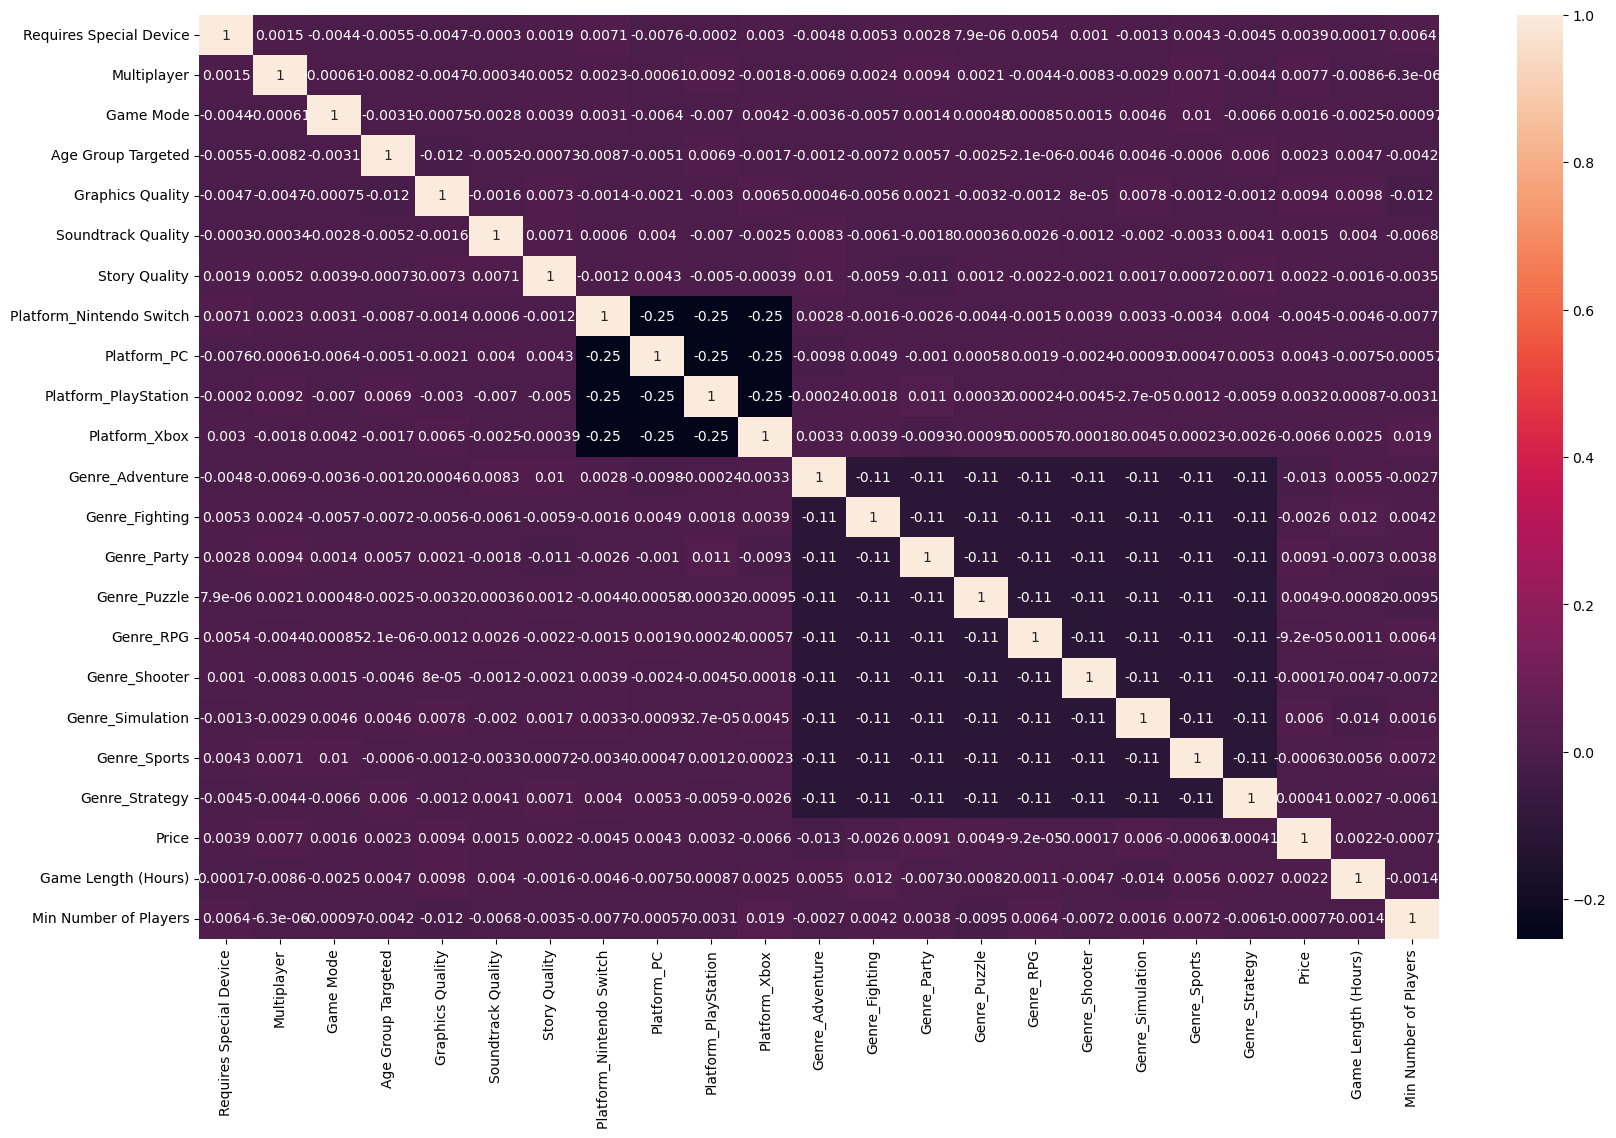

In [23]:
plt.figure(figsize=(20,12))
sns.heatmap(data=X_train_df.corr(),annot=True)
plt.show()

In [24]:
model = LinearRegression()
model.fit(X_train_last,y_train)
y_pred = model.predict(X_test_last)
print(r2_score(y_test,y_pred))

0.976033209913893


In [25]:
import pickle

In [ ]:
with open("game_rating_model.pkl","wb") as f:
    pickle.dump({
        "model" : model,
        "preprocessor" : preprocessor,
        "scaler": scaler_train,
    },f)

In [27]:
df.columns

Index(['User Rating', 'Age Group Targeted', 'Price', 'Platform',
       'Requires Special Device', 'Genre', 'Multiplayer',
       'Game Length (Hours)', 'Graphics Quality', 'Soundtrack Quality',
       'Story Quality', 'Game Mode', 'Min Number of Players'],
      dtype='object')